# To convert nii.gz file to png for all slices

### Source: https://github.com/madsendennis/notebooks/blob/master/volume_segmentation_with_unet/01_Volume-Segmentation-with-UNET_Pre-processing.ipynb

In [2]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# CONSTANTS!!!

# STEP 1 - Load and visualize data
dataInputPath = 'D:/seg/jun ma/'
imagePathInput = os.path.join(dataInputPath, 'COVID-19-CT-Seg_20cases/')
maskPathInput = os.path.join(dataInputPath, 'Infection_Mask/')

dataOutputPath = 'D:/seg/jun ma/output/'
imageSliceOutput = os.path.join(dataOutputPath, 'img/')
maskSliceOutput = os.path.join(dataOutputPath, 'mask/')

# STEP 2 - Image normalization
HOUNSFIELD_MIN = -1000
HOUNSFIELD_MAX = 2000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3

In [4]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput, 'coronacases_org_001.nii')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(-1021.0, 2996.0, (512, 512, 301), numpy.memmap)

In [7]:
maskPath = os.path.join(maskPathInput, 'coronacases_001.nii')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask)

(0.0, 1.0, (512, 512, 301), numpy.memmap)

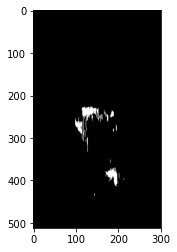

In [23]:
# Show image slice
imgSlice = mask[200,:,:]
plt.imshow(imgSlice, cmap='gray')
plt.show()

In [24]:
# Normalize image
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)

(0.0, 1.0, (512, 512, 301), numpy.ndarray)

In [ ]:
# Read image or mask volume
def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgPath, normalize=True)
readImageVolume(maskPath, normalize=False)

In [29]:
# Save volume slice to file
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [30]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)
            
    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [31]:
# Read and process image volumes
for index, filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii'))):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'ct'+str(index), imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_001.nii (512, 512, 301) 1325 0.0 1.0
512 512 301
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/img/ct0-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/img/ct0-slice511_y.png
D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_001.nii, 1024 slices created 

D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_002.nii (512, 512, 200) 1224 0.0 1.0
512 512 200
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/img/ct1-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/img/ct1-slice511_y.png
D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_002.nii, 1024 slices created 

D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_003.nii (512, 512, 200) 1224 0.0 1.0
512 512 200
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/img/ct2-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/img/ct2-slice511_y.png
D:/seg/jun ma/COVID-19-CT-Seg_20cases\coronacases_org_003.nii, 1024 slices created 

D:/seg/jun ma/COVID-19-CT-Seg_20ca

In [32]:
# Read and process image mask volumes
for index, filename in enumerate(sorted(glob.iglob(maskPathInput+'*.nii'))):
    img = readImageVolume(filename, False)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'ct'+str(index), maskSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

D:/seg/jun ma/Infection_Mask\coronacases_001.nii (512, 512, 301) 1325 0.0 1.0
512 512 301
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/mask/ct0-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/mask/ct0-slice511_y.png
D:/seg/jun ma/Infection_Mask\coronacases_001.nii, 1024 slices created 

D:/seg/jun ma/Infection_Mask\coronacases_002.nii (512, 512, 200) 1224 0.0 1.0
512 512 200
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/mask/ct1-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/mask/ct1-slice511_y.png
D:/seg/jun ma/Infection_Mask\coronacases_002.nii, 1024 slices created 

D:/seg/jun ma/Infection_Mask\coronacases_003.nii (512, 512, 200) 1224 0.0 1.0
512 512 200
Slicing X: 
Slicing Y: aved: D:/seg/jun ma/output/mask/ct2-slice511_x.png
[+] Slice saved: D:/seg/jun ma/output/mask/ct2-slice511_y.png
D:/seg/jun ma/Infection_Mask\coronacases_003.nii, 1024 slices created 

D:/seg/jun ma/Infection_Mask\coronacases_004.nii (512, 512, 270) 1294 0.0 1.0
512 512 270
Slicing X: 
Slic